In [2]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Weather Dashboard"),
    html.Div([
        dcc.Input(id='city-input', type='text', placeholder='Enter a city name'),
        html.Button('Submit', id='submit-button', n_clicks=0),
        html.Div(id='weather-output')
    ])
])

@app.callback(
    Output('weather-output', 'children'),
    Input('submit-button', 'n_clicks'),
    Input('city-input', 'value')
)
def update_weather(n_clicks, city):
    if n_clicks > 0 and city:
        api_key = '3a2ef4aacad33a5763e19a9c494c0340'
        url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'
        response = requests.get(url)
        data = response.json()
        if 'name' in data and 'main' in data and 'weather' in data:
            temperature_kelvin = data['main']['temp']
            temperature_celsius = temperature_kelvin - 273.15  # Convert Kelvin to Celsius
            weather = {
                'city': data['name'],
                'temperature': temperature_celsius,
                'description': data['weather'][0]['description']
            }
            return [
                html.Div(f"Weather in {weather['city']}:"),
                html.Div(f"Temperature: {weather['temperature']} °C"),
                html.Div(f"Description: {weather['description']}")
            ]
        else:
            return "City not found or data unavailable."
    else:
        return ""

if __name__ == '__main__':
    app.run_server(debug=True)


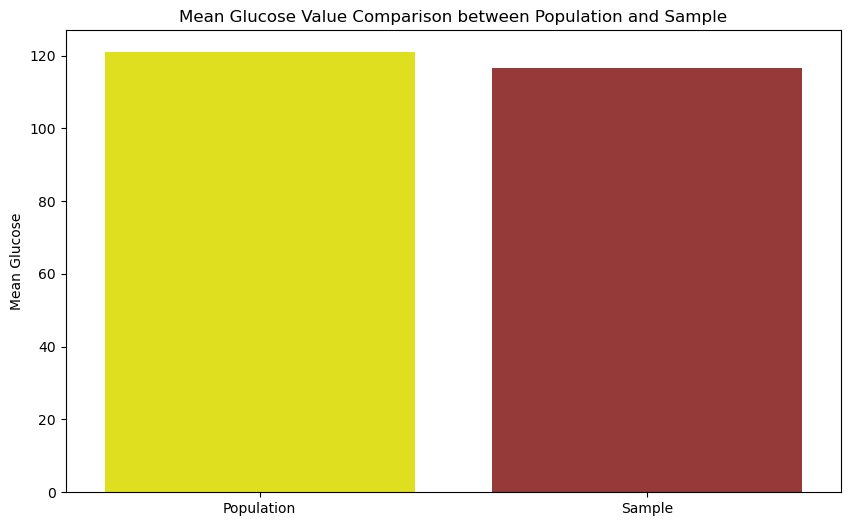

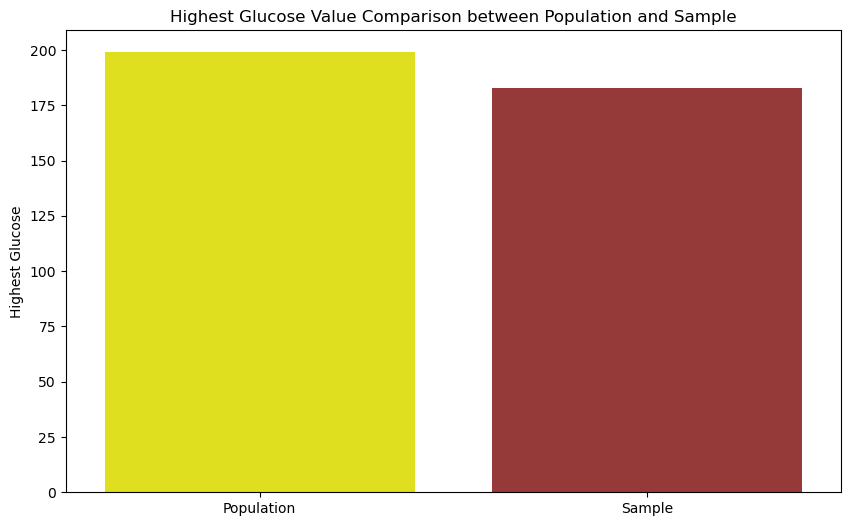

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')

np.random.seed(42)

sample = df.sample(n=25)

population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()


colors = ['yellow','brown'] 

plt.figure(figsize=(10, 6))
sns.barplot(x=['Population', 'Sample'], y=[population_mean_glucose, sample_mean_glucose], palette=colors)
plt.title('Mean Glucose Value Comparison between Population and Sample')
plt.ylabel('Mean Glucose')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=['Population', 'Sample'], y=[population_max_glucose, sample_max_glucose], palette=colors)
plt.title('Highest Glucose Value Comparison between Population and Sample')
plt.ylabel('Highest Glucose')
plt.show()


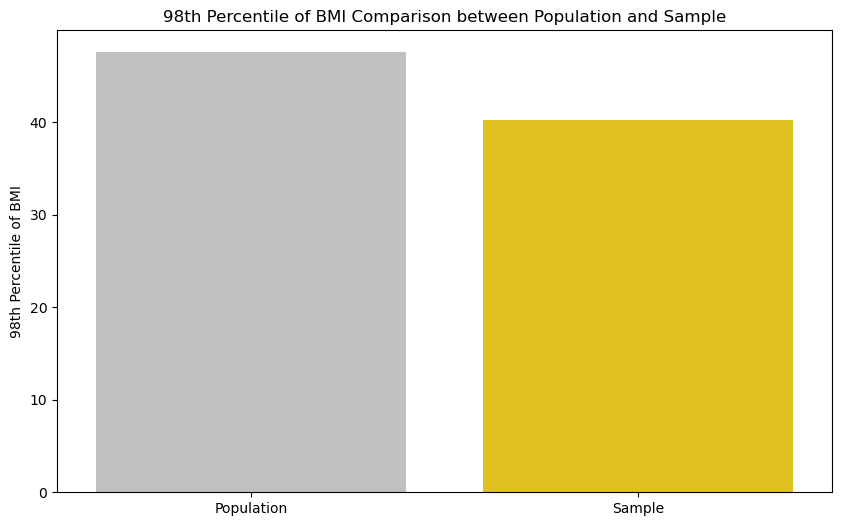

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')

np.random.seed(42)

sample = df.sample(n=25)

population_98th_percentile_bmi = np.percentile(df['BMI'], 98)
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)


colors = ['silver', 'gold']  

plt.figure(figsize=(10, 6))
sns.barplot(x=['Population', 'Sample'], y=[population_98th_percentile_bmi, sample_98th_percentile_bmi], palette=colors)
plt.title('98th Percentile of BMI Comparison between Population and Sample')
plt.ylabel('98th Percentile of BMI')
plt.show()



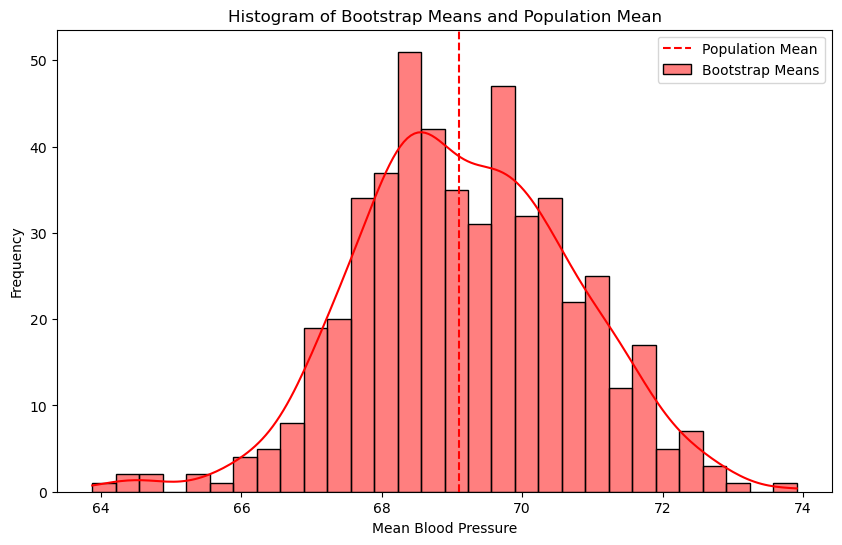

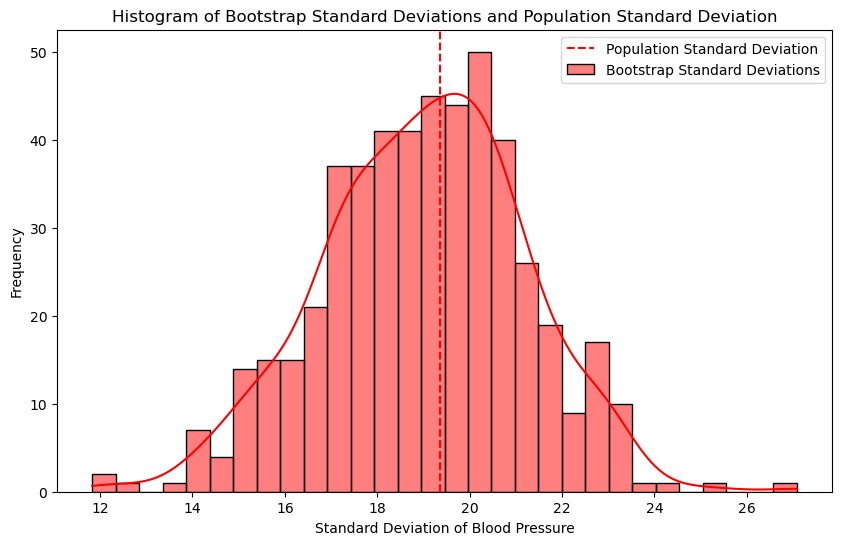

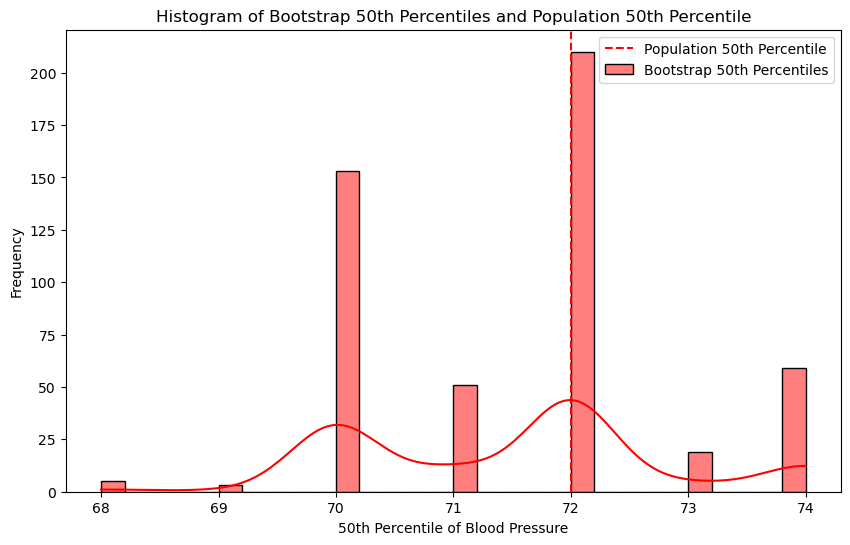

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Set seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples and sample size
n_samples = 500
sample_size = 150

# Initialize arrays to store bootstrap statistics
bootstrap_means = np.zeros(n_samples)
bootstrap_stds = np.zeros(n_samples)
bootstrap_percentiles = np.zeros(n_samples)

# Perform bootstrap sampling and calculate statistics
for i in range(n_samples):
    bootstrap_sample = np.random.choice(df['BloodPressure'], size=sample_size, replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_stds[i] = np.std(bootstrap_sample)
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 50)  # 50th percentile (median)

# Calculate population statistics
population_mean = df['BloodPressure'].mean()
population_std = df['BloodPressure'].std()
population_percentile = np.percentile(df['BloodPressure'], 50)

# Create histograms to compare means
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=True, color='red', label='Bootstrap Means')
plt.axvline(x=population_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Histogram of Bootstrap Means and Population Mean')
plt.xlabel('Mean Blood Pressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create histograms to compare standard deviations
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_stds, bins=30, kde=True, color='red', label='Bootstrap Standard Deviations')
plt.axvline(x=population_std, color='red', linestyle='--', label='Population Standard Deviation')
plt.title('Histogram of Bootstrap Standard Deviations and Population Standard Deviation')
plt.xlabel('Standard Deviation of Blood Pressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create histograms to compare percentiles
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_percentiles, bins=30, kde=True, color='red', label='Bootstrap 50th Percentiles')
plt.axvline(x=population_percentile, color='red', linestyle='--', label='Population 50th Percentile')
plt.title('Histogram of Bootstrap 50th Percentiles and Population 50th Percentile')
plt.xlabel('50th Percentile of Blood Pressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

